# Building an Artificial Neural Network

You are about to start a project that involves building an Artificial Neural Network (ANN) to predict customer churn. (predicting whether a customer will churn or not)


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

Loading the Dataset: The dataset is loaded into a pandas DataFrame, and the features (X) and the target variable (y) are extracted. The features appear to include columns 3 to the second-to-last column, and the target variable is the last column.

In [2]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

display(dataset)
print("------------------")
print(X)
print("------------------")
print(y)

Mounted at /content/drive


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


------------------
[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
------------------
[1 0 1 ... 1 1 0]


Encoding Categorical Data:

The dataset is loaded, and categorical data such as "Gender" and "Geography" are encoded into numerical formats.

Label Encoding: The "Gender" column is label-encoded, transforming the text labels into numerical values.


In [3]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

print (X)


[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding: The "Geography" column is one-hot encoded, converting the categorical data into a format that can be provided to the model.

In [4]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print (X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print (X_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


In [7]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Building the ANN:

The ANN is initialized using TensorFlow/Keras.<br>
Two hidden layers are added, each with 6 units and using the ReLU activation function.<br>
An output layer is added with 1 unit and a sigmoid activation function, as this is a binary classification problem (predicting whether a customer will churn or not).

In [8]:
# Initialising the ANN
ann = tf.keras.models.Sequential()

In [9]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [10]:
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [11]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN:

The model is compiled using the Adam optimizer, binary cross-entropy as the loss function, and accuracy as the evaluation metric.<br>
The model is trained for 100 epochs with a batch size of 32.

In [13]:
# Fitting the ANN to the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7923 - loss: 0.5514
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8101 - loss: 0.4583
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8278 - loss: 0.4177
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8305 - loss: 0.4041
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.3972
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.3793
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8479 - loss: 0.3716
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3601
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8579 - loss: 0.3461
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3565
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8563 - loss: 0.3528
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Making Predictions:

The model makes predictions on the test dataset.<br>
The predictions are thresholded at 0.5 to classify customers as likely to churn or not.


In [14]:
# predict the test dataset
y_pred = ann.predict(X_test)
# This line uses the predict method of the trained model to generate predictions for the data in X_test.
# The output y_pred will be an array of probabilities, representing the likelihood of each customer churning.

y_pred = (y_pred > 0.5)
# This line converts the predicted probabilities into binary class labels (0 or 1).
# It applies a threshold of 0.5, meaning if the predicted probability is greater than 0.5,
# the customer is predicted to churn (1), otherwise, they are predicted not to churn (0).

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
# This line concatenates the predicted churn labels (y_pred) and the actual churn labels (y_test) into a single NumPy array and prints it.
# This allows you to see the predicted and actual values side-by-side for comparison.
# The .reshape(-1, 1) is used to ensure both arrays have the same shape before concatenation.

#### When you see a result like [0 1] in the output from the code cell, it means:
# The first number, 0, is the model's predicted value for churn. In this case, the model predicted that the customer will not churn.
# The second number, 1, is the actual value for churn from your test dataset. This means the customer did churn.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


> See the performance of the model by confusion matrix and accuracy score.

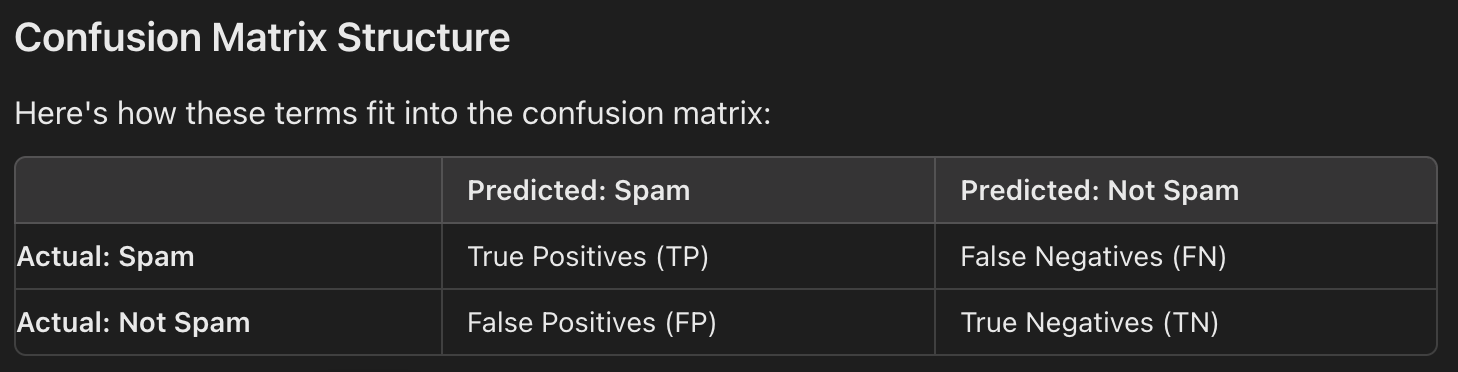

**Evaluating the Model**

A confusion matrix is calculated to evaluate the performance of the model in terms of true positives, true negatives, false positives, and false negatives.<br>
The accuracy score is calculated to measure the proportion of correctly classified instances in the test set.

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Confusion Matrix : \n",cm)
print("\nAccuracy score : \n",ac)

Confusion Matrix : 
 [[1495  100]
 [ 191  214]]

Accuracy score : 
 0.8545
